## **PRAKTIKUM MODUL 4 PEMBELAJARAN MESIN**


---

**NAMA : MEINISA** \
**NIM : 121450076** \
**KELAS : RB**

## **ANN**

- Impor library yang diperlukan

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Tentukan path dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_data_dir = '/content/drive/MyDrive/SAWI/train'
test_data_dir = '/content/drive/MyDrive/SAWI/valid'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Persiapan data dengan augmentasi gambar

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 800 images belonging to 3 classes.
Found 199 images belonging to 2 classes.


Menggunakan modul ImageDataGenerator dari Keras untuk mengelola proses augmentasi dan normalisasi pada data gambar yang digunakan dalam pelatihan dan pengujian model. Pada bagian train_datagen, objek ImageDataGenerator dibuat dengan parameter rescale=1./255 untuk mengubah nilai piksel menjadi rentang 0-1, shear_range=0.2 untuk menerapkan efek shear (miring) pada gambar, zoom_range=0.2 untuk memberikan efek zoom secara acak, dan horizontal_flip=True untuk melakukan flip horizontal pada gambar secara acak. Objek test_datagen juga dibuat untuk melakukan rescale pada data pengujian. Selanjutnya, objek train_datagen digunakan untuk membuat train_generator dengan memuat data pelatihan dari direktori train_data_dir, menyesuaikan ukuran gambar menjadi 64x64 piksel, menggunakan batch size sebesar 32, dan mengaturnya sebagai tugas klasifikasi biner. Demikian pula, objek test_datagen digunakan untuk membuat test_generator dengan parameter yang serupa untuk data pengujian. Dan didapatkan pada train_generator ada 800 gambar yang terbagi ke dalam 3 kelas, sedangkan dalam test_generator ada 199 gambar yang terbagi ke dalam 2 kelas.

- Bangun model ANN sederhana

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid') # Output 1 neuron karena ini maslaah klasifikasi biner
])

Pertama, terdapat sebuah Convolutional Layer dengan 32 filter berukuran 3x3, yang mengaplikasikan fungsi aktivasi ReLU untuk mengekstraksi fitur dari gambar input berukuran 64x64 piksel dan memiliki tiga saluran warna (RGB). Layer MaxPooling2D kemudian digunakan untuk mereduksi dimensi spasial dengan jendela pooling 2x2. Setelah itu, Flatten Layer mengubah tensor hasilnya menjadi satu dimensi. Dilanjutkan dengan Hidden Layer (Dense) yang memiliki 128 neuron dengan fungsi aktivasi ReLU untuk mempelajari pola-pola yang lebih kompleks dari fitur-fitur yang telah diekstraksi. Lalu dilakukan Dropout Layer dengan tingkat dropout 50% untuk menghindari overfitting. Terakhir, Output Layer memiliki satu neuron dengan fungsi aktivasi sigmoid, sesuai dengan masalah klasifikasi biner.

- Kompilasi model dengan optimizer, loss function, dan metrik yang sesuai

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Dalam kompilasi ini, digunakan optimizer 'adam', yang merupakan algoritma optimasi populer dalam deep learning. Algoritma ini secara adaptif menyesuaikan laju pembelajaran selama pelatihan. Sebagai fungsi kerugian (loss function), dipilih 'binary_crossentropy' karena kita memiliki tugas klasifikasi biner. Fungsi ini cocok untuk masalah di mana model perlu memprediksi antara dua kelas yang saling eksklusif. Metrics yang diukur selama pelatihan dan pengujian adalah akurasi ('accuracy'), yang memberikan informasi tentang seberapa baik model dapat mengklasifikasikan data dengan benar.






- Latih model pada data pelatihan

In [ ]:
model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
25/25 [==============================] - 232s 9s/step - loss: -225.2010 - accuracy: 0.4975 - val_loss: 876.5974 - val_accuracy: 0.5025
Epoch 2/5
25/25 [==============================] - 27s 1s/step - loss: -2305.5549 - accuracy: 0.5000 - val_loss: 5684.7480 - val_accuracy: 0.5025
Epoch 3/5
25/25 [==============================] - 28s 1s/step - loss: -10110.4688 - accuracy: 0.5000 - val_loss: 19723.6562 - val_accuracy: 0.5025
Epoch 4/5
25/25 [==============================] - 37s 1s/step - loss: -28141.1797 - accuracy: 0.5000 - val_loss: 50418.5547 - val_accuracy: 0.5025
Epoch 5/5
25/25 [==============================] - 35s 1s/step - loss: -64614.7812 - accuracy: 0.5000 - val_loss: 104888.7266 - val_accuracy: 0.5025


Menggunakan metode fit pada model Keras untuk melatih model neural network. Proses pelatihan dilakukan dengan menggunakan data generator train_generator selama 5 epoch atau iterasi penuh melalui seluruh dataset pelatihan. Setiap epoch melibatkan menyajikan seluruh dataset pelatihan ke dalam model untuk memperbarui bobot dan parameter agar model dapat mempelajari pola yang lebih baik dari data. Dengan parameter validation_data diatur menggunakan data generator test_generator untuk memonitor kinerja model pada dataset pengujian selama pelatihan

- Evaluasi performa model pada data pengujian

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nAkurasi pengujian: {test_acc}')

7/7 [==============================] - 6s 910ms/step - loss: 104888.7109 - accuracy: 0.5025

Akurasi pengujian: 0.5025125741958618


Menggunakan metode evaluate pada data pengujian yang disediakan oleh test_generator. Evaluasi menghasilkan dua nilai: test_loss yang mencerminkan seberapa baik model memprediksi label pada data pengujian, dan test_acc yang menyatakan akurasi pengujian, yaitu persentase ketepatan prediksi model terhadap data pengujian. Lalu didapatkan akurasi pengujian sebesar 0.5025125741958618

- Lakukan prediksi menggunakan model

In [ ]:
def predict(image_path):
  # Praproses gambar untuk memenuhi input model
  img = image.load_img(image_path, target_size = (64, 64))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0 # Normalisasi nilai piksel ke rentang 0-1

  # Lakukan prediksi menggunakan model
  prediction = model.predict(img_array)

  # Interpretasikan hasil prediksi
  if prediction[0][0] > 0.5:
    print ('Prediksi: Terkena Hama')
  else:
    print ('Prediksi: Tidak terkena Hama')

# Path gambar yang ingin diprediksi
image_path = test_data_dir + '/copy of Data Sawi Ada Hama/103.png'
predict(image_path)

image_path = test_data_dir + '/copy of Data Sawi Tanpa Hama/103.png'
predict(image_path)

1/1 [==============================] - 0s 303ms/step
Prediksi: Terkena Hama
1/1 [==============================] - 0s 36ms/step
Prediksi: Terkena Hama



Fungsi predict mengambil path gambar sebagai input, melakukan praproses untuk sesuaikan dengan input model, dan kemudian menggunakan model untuk memprediksi apakah gambar tersebut mengandung hama atau tidak. Hasil prediksi diinterpretasikan: jika nilai prediksi lebih dari 0.5, dianggap terkena hama; sebaliknya, jika nilai prediksi kurang dari atau sama dengan 0.5, dianggap tidak terkena hama. Dalam contoh pengujian, dua gambar dari direktori pengujian (satu dengan hama dan satu tanpa hama) diuji menggunakan fungsi predict untuk menampilkan hasil prediksi. Dan didapatkan hasil bahwa kedua gambar diprediksi terkena hama.

## **LATIHAN ANN**
#### Buatlah sebuah model ANN dengan studi kasus gambar sayur sawi dengan database “data Latihan”

- Impor library yang diperlukan

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Tentukan path dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_data_dir = '/content/drive/MyDrive/SAWI/train'
test_data_dir = '/content/drive/MyDrive/SAWI/valid'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Persiapan data dengan augmentasi gambar

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 800 images belonging to 3 classes.


Menggunakan modul ImageDataGenerator dari Keras untuk mengelola proses augmentasi dan normalisasi pada data gambar yang digunakan dalam pelatihan dan pengujian model. Pada bagian train_datagen, objek ImageDataGenerator dibuat dengan parameter rescale=1./255 untuk mengubah nilai piksel menjadi rentang 0-1, shear_range=0.2 untuk menerapkan efek shear (miring) pada gambar, zoom_range=0.2 untuk memberikan efek zoom secara acak, dan horizontal_flip=True untuk melakukan flip horizontal pada gambar secara acak. Selanjutnya, objek train_datagen digunakan untuk membuat train_generator dengan memuat data pelatihan dari direktori train_data_dir, menyesuaikan ukuran gambar menjadi 64x64 piksel, menggunakan batch size sebesar 32, dan mengaturnya sebagai tugas klasifikasi biner. Dan didapatkan pada train_generator ada 800 gambar yang terbagi ke dalam 3 kelas.

- Bangun model ANN sederhana

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid') # Output 1 neuron karena ini maslaah klasifikasi biner
])

Pertama, terdapat sebuah Convolutional Layer dengan 32 filter berukuran 3x3, yang mengaplikasikan fungsi aktivasi ReLU untuk mengekstraksi fitur dari gambar input berukuran 64x64 piksel dan memiliki tiga saluran warna (RGB). Layer MaxPooling2D kemudian digunakan untuk mereduksi dimensi spasial dengan jendela pooling 2x2. Setelah itu, Flatten Layer mengubah tensor hasilnya menjadi satu dimensi. Dilanjutkan dengan Hidden Layer (Dense) yang memiliki 128 neuron dengan fungsi aktivasi ReLU untuk mempelajari pola-pola yang lebih kompleks dari fitur-fitur yang telah diekstraksi. Lalu dilakukan Dropout Layer dengan tingkat dropout 50% untuk menghindari overfitting. Terakhir, Output Layer memiliki satu neuron dengan fungsi aktivasi sigmoid, sesuai dengan masalah klasifikasi biner.

- Kompilasi model dengan optimizer, loss function, dan metrik yang sesuai

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Dalam kompilasi ini, digunakan optimizer 'adam', yang merupakan algoritma optimasi populer dalam deep learning. Algoritma ini secara adaptif menyesuaikan laju pembelajaran selama pelatihan. Sebagai fungsi kerugian (loss function), dipilih 'binary_crossentropy' karena kita memiliki tugas klasifikasi biner. Fungsi ini cocok untuk masalah di mana model perlu memprediksi antara dua kelas yang saling eksklusif. Metrics yang diukur selama pelatihan dan pengujian adalah akurasi ('accuracy'), yang memberikan informasi tentang seberapa baik model dapat mengklasifikasikan data dengan benar.






- Latih model pada data pelatihan

In [ ]:
model.fit(train_generator, epochs=5, validation_data=train_generator)

Epoch 1/5
25/25 [==============================] - 66s 3s/step - loss: -266.9418 - accuracy: 0.4925 - val_loss: -858.9811 - val_accuracy: 0.5000
Epoch 2/5
25/25 [==============================] - 65s 3s/step - loss: -2506.8406 - accuracy: 0.5000 - val_loss: -5355.7988 - val_accuracy: 0.5000
Epoch 3/5
25/25 [==============================] - 68s 3s/step - loss: -10649.7812 - accuracy: 0.5000 - val_loss: -18572.3906 - val_accuracy: 0.5000
Epoch 4/5
25/25 [==============================] - 66s 3s/step - loss: -30317.3008 - accuracy: 0.5000 - val_loss: -46905.7305 - val_accuracy: 0.5000
Epoch 5/5
25/25 [==============================] - 43s 2s/step - loss: -68628.4688 - accuracy: 0.5000 - val_loss: -96583.0781 - val_accuracy: 0.5000


Menggunakan metode fit pada model Keras untuk melatih model neural network. Proses pelatihan dilakukan dengan menggunakan data generator train_generator selama 5 epoch atau iterasi penuh melalui seluruh dataset pelatihan. Setiap epoch melibatkan menyajikan seluruh dataset pelatihan ke dalam model untuk memperbarui bobot dan parameter agar model dapat mempelajari pola yang lebih baik dari data. Dengan parameter validation_data diatur menggunakan data generator train_generator untuk memonitor kinerja model pada dataset pengujian selama pelatihan

- Evaluasi performa model pada data pengujian

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
print(f'\nAkurasi pelatihan: {train_acc}')

25/25 [==============================] - 22s 874ms/step - loss: -96913.0000 - accuracy: 0.5000

Akurasi pelatihan: 0.5


Menggunakan metode evaluate pada data pengujian yang disediakan oleh train_generator. Evaluasi menghasilkan dua nilai: train_loss yang mencerminkan seberapa baik model memprediksi label pada data pelatihan, dan train_acc yang menyatakan akurasi pelatihan, yaitu persentase ketepatan prediksi model terhadap data pelatihan. Lalu didapatkan akurasi pelatihan sebesar 0.5

- Lakukan prediksi menggunakan model

In [ ]:
def predict(image_path):
  # Praproses gambar untuk memenuhi input model
  img = image.load_img(image_path, target_size = (64, 64))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0 # Normalisasi nilai piksel ke rentang 0-1

  # Lakukan prediksi menggunakan model
  prediction = model.predict(img_array)

  # Interpretasikan hasil prediksi
  if prediction[0][0] > 0.5:
    print ('Prediksi: Terkena Hama')
  else:
    print ('Prediksi: Tidak terkena Hama')

# Path gambar yang ingin diprediksi
image_path = train_data_dir + '/copy of Data Sawi Ada Hama/195.png'
predict(image_path)

image_path = train_data_dir + '/copy of Data Sawi Tanpa Hama/195.png'
predict(image_path)

1/1 [==============================] - 0s 101ms/step
Prediksi: Terkena Hama
1/1 [==============================] - 0s 23ms/step
Prediksi: Terkena Hama



Fungsi predict mengambil path gambar sebagai input, melakukan praproses untuk sesuaikan dengan input model, dan kemudian menggunakan model untuk memprediksi apakah gambar tersebut mengandung hama atau tidak. Hasil prediksi diinterpretasikan: jika nilai prediksi lebih dari 0.5, dianggap terkena hama; sebaliknya, jika nilai prediksi kurang dari atau sama dengan 0.5, dianggap tidak terkena hama. Dalam contoh pelatihan, dua gambar dari direktori pelatihan (satu dengan hama dan satu tanpa hama) diuji menggunakan fungsi predict untuk menampilkan hasil prediksi. Dan didapatkan hasil bahwa gambar 195 pada data sawi ada hama diprediksi terkena hama, dan gambar 195 pada data sawi tanpa hama juga diprediksi terkena hama.

**KESIMPULAN**
Dapat diketahui bahwa data train dan data test sama sama memiliki tingkat akurasi sekitar 50%. Hal ini berarti perlu dilakukannya pelatihan pada data dengan mengenali lebih banyak gambar agar dapat meningkatkan akurasi prediksi dikemudian hari.

**PSEUDOCODE**



```
1. Mengimpor Library yang dibutuhkan
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2. Mengimport data dari Google Drive
import google.colab

3. Menghubungkan Google Drive ke Colab
google.colab.drive.mount('/content/drive')

4. Menentukan path data
train_data_dir = '/content/drive/MyDrive/SAWI/train'
test_data_dir = '/content/drive/MyDrive/SAWI/valid'

5. Persiapan data
# Melakukan normalisasi data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

6. Melakukan augmentasi data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

7. Bangun model ANN sederhana
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

8. Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

9. Latih model
model.fit(train_generator, epochs=5, validation_data=test_generator)

10. Evaluasi performa model
test_loss, test_acc = model.evaluate(test_generator)

11. Lakukan prediksi
def predict(image_path):
    Praproses gambar
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    Lakukan prediksi
    prediction = model.predict(img_array)
    Interpretasikan hasil prediksi
    if prediction[0][0] > 0.5:
        print('Prediksi: Terkena Hama')
    else:
        print('Prediksi: Tidak terkena Hama')

12. Prediksi gambar
image_path = test_data_dir + '/Data Sawi Ada Hama/103.png'
predict(image_path) \
image_path = test_data_dir + '/Data Sawi Tanpa Hama/103.png'
predict(image_path)


```



**FLOWCHART**

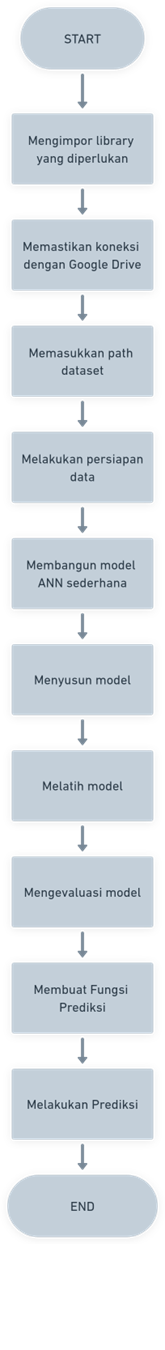

## **CNN**

- Tahap pertama persiapan data dan library

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

- Pastikan terhubung dengan Gdrive masing-masing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_with_pest = '/content/drive/MyDrive/SAWI/valid/copy of Data Sawi Ada Hama'
path_without_pest = '/content/drive/MyDrive/SAWI/valid/copy of Data Sawi Tanpa Hama'

In [ ]:
#load data files
pest_files = os.listdir(path_with_pest)
print(pest_files[0:5])
print (pest_files[-5:])

nopest_files = os.listdir (path_without_pest)
print(nopest_files [0:5])
print(nopest_files[-5:])

print(f'Number of with pest images:{len(pest_files)}')
print(f'Number of without pest images:{len(nopest_files)}')

['13.png', '12.png', '117.png', '10.png', '101.png']
['153.png', '164.png', '155.png', '18.png', '181.png']
['102.png', '114.png', '104.png', '128.png', '127.png']
['138.png', '145.png', '159.png', '187.png', '18.png']
Number of with pest images:99
Number of without pest images:100


Mengeksplorasi data gambar dalam dua direktori yang berbeda, yaitu path_with_pest dan path_without_pest. Pertama, menggunakan modul os, list dari nama file dalam masing-masing direktori diambil dan dicetak lima file pertama dan lima file terakhir dari setiap direktori. Selanjutnya, jumlah total file gambar dalam setiap kategori dicetak.

- Membuat label pada data

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
99
100
199
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


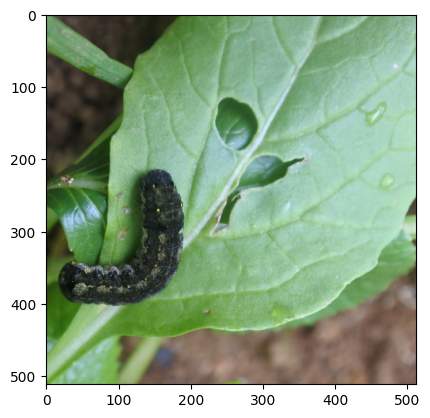

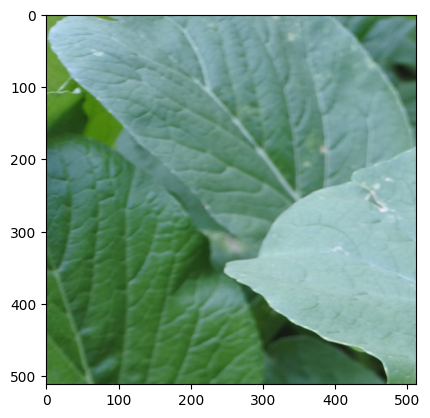

In [ ]:
pest_files = [1]*len(pest_files)
nopest_files = [0]*len(nopest_files)
print(pest_files[0:5]),print(nopest_files[0:5])
print(len(pest_files)),print(len(nopest_files))

labels = pest_files + nopest_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

# display with pest image
img = mpimg.imread(path_with_pest + '/16.png')
implot = plt.imshow(img)
plt.show()

# displaying without pest image
img = mpimg.imread(path_without_pest + '/16.png')
implot = plt.imshow(img)
plt.show()

Menyiapkan label yang sesuai dengan data gambar yang akan digunakan dalam pelatihan model. Dua list, pest_files dan nopest_files, dibuat dan diisi dengan nilai 1 dan 0 secara sesuai. Panjang kedua list ini disesuaikan dengan jumlah file gambar dalam set data "pest" dan "nopest". Setelah itu, kedua list tersebut di-print untuk menunjukkan lima elemen pertama dari masing-masingnya, dan total panjangnya dicetak. Selanjutnya, label-label ini digabungkan menjadi satu list tunggal yang disebut labels, mewakili kategori hama (1) dan tanpa hama (0). Panjang total dari list labels dicetak, dan lima elemen pertama serta lima elemen terakhirnya juga dicetak. Terakhir, dua gambar (dengan hama dan tanpa hama) dari direktori yang sesuai ditampilkan untuk memberikan gambaran visual tentang data yang akan digunakan dalam pelatihan model.

- Pemrosesan data

In [ ]:
data = []

pest_files = os.listdir(path_with_pest)

for img_file in pest_files:
  image = Image.open(path_with_pest + '/' + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

nopest_files = os.listdir (path_without_pest)

for img_file in nopest_files:
  image = Image.open(path_without_pest + '/' + str(img_file))
  image = image.resize((128,128))
  image = image.convert ('RGB')
  image = np.array(image)
  data.append(image)

type (data),len(data)

data[0]

# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

Kode ini berfungsi untuk memproses gambar pada dua set data yang berbeda (dengan dan tanpa hama) dan menyimpannya dalam bentuk array untuk keperluan pelatihan model. Pertama, file gambar pada direktori yang mengandung hama (path_with_pest) diambil dan diubah menjadi array menggunakan modul Image dari library PIL. Setiap gambar kemudian diubah ukurannya menjadi 128x128 piksel dan dikonversi menjadi mode warna RGB. Proses yang sama juga diulang untuk gambar pada direktori tanpa hama (path_without_pest). Setiap array gambar kemudian ditambahkan ke dalam list data. Akhirnya, list ini diubah menjadi array numpy dengan nama x. Dengan asumsi bahwa sebelumnya ada label yang sesuai untuk setiap gambar (misalnya, labels), array label tersebut juga diubah menjadi array numpy dengan nama y.

- Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print (x.shape, x_train.shape, x_test.shape)

x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(199, 128, 128, 3) (159, 128, 128, 3) (40, 128, 128, 3)


(array([[[ 16,  21,  15],
         [ 14,  19,  13],
         [ 14,  20,  13],
         ...,
         [173, 212, 185],
         [172, 210, 185],
         [170, 208, 183]],
 
        [[ 19,  24,  18],
         [ 17,  23,  17],
         [ 16,  23,  18],
         ...,
         [172, 209, 185],
         [172, 210, 185],
         [173, 210, 186]],
 
        [[ 24,  29,  23],
         [ 24,  29,  24],
         [ 17,  24,  21],
         ...,
         [168, 207, 184],
         [170, 210, 186],
         [172, 211, 188]],
 
        ...,
 
        [[152, 192, 188],
         [149, 189, 187],
         [146, 186, 185],
         ...,
         [137, 178, 163],
         [142, 183, 168],
         [146, 187, 171]],
 
        [[154, 193, 190],
         [156, 194, 193],
         [153, 193, 192],
         ...,
         [137, 177, 162],
         [142, 181, 164],
         [146, 185, 167]],
 
        [[157, 196, 194],
         [157, 196, 195],
         [155, 194, 193],
         ...,
         [142, 181, 164],
  

Kode tersebut mengimplementasikan proses pembagian dataset menjadi data pelatihan (x_train, y_train) dan data pengujian (x_test, y_test) menggunakan fungsi train_test_split dari scikit-learn. Data dibagi dengan rasio 80:20 untuk data pelatihan dan pengujian, dan random_state diatur ke 42 untuk memastikan reproduktibilitas hasil. Hasil cetakan menunjukkan dimensi dari array asli (x), data pelatihan (x_train), dan data pengujian (x_test). Selanjutnya, nilai piksel dalam data pelatihan dan pengujian diukur ulang (scaled) dengan membagi setiap nilai piksel dengan 255, sehingga mendapatkan nilai dalam rentang 0 hingga 1. Cetakannya menunjukkan nilai piksel dari gambar pertama dalam data pelatihan sebelum dan setelah diukur ulang.

- CNN

In [ ]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
5/5 [==============================] - 5s 860ms/step - loss: 1.1390 - acc: 0.5105 - val_loss: 0.6926 - val_acc: 0.4375
Epoch 2/15
5/5 [==============================] - 5s 1s/step - loss: 0.7749 - acc: 0.5245 - val_loss: 0.7149 - val_acc: 0.3750
Epoch 3/15
5/5 [==============================] - 5s 951ms/step - loss: 0.6938 - acc: 0.4965 - val_loss: 0.7339 - val_acc: 0.3750
Epoch 4/15
5/5 [==============================] - 3s 635ms/step - loss: 0.7164 - acc: 0.4755 - val_loss: 0.6961 - val_acc: 0.3750
Epoch 5/15
5/5 [==============================] - 3s 649ms/step - loss: 0.6870 - acc: 0.5175 - val_loss: 0.6950 - val_acc: 0.3750
Epoch 6/15
5/5 [==============================] - 4s 775ms/step - loss: 0.6701 - acc: 0.5874 - val_loss: 0.8437 - val_acc: 0.3750
Epoch 7/15
5/5 [==============================] - 6s 1s/step - loss: 0.7047 - acc: 0.5455 - val_loss: 0.7219 - val_acc: 0.3750
Epoch 8/15
5/5 [==============================] - 4s 655ms/step - loss: 0.6830 - acc: 0.5594 - v


Kode tersebut mendefinisikan sebuah model neural network menggunakan Keras untuk tugas klasifikasi dengan dua kelas. Model ini terdiri dari dua lapisan konvolusi (Conv2D) dengan masing-masing dilanjutkan oleh lapisan max pooling untuk mengekstraksi dan mereduksi fitur dari gambar input berukuran 128x128 piksel dan tiga saluran warna (RGB). Setelah itu, terdapat dua lapisan Dense (fully connected) dengan aktivasi ReLU dan Dropout untuk mencegah overfitting. Flatten Layer digunakan untuk mengubah tensor menjadi satu dimensi agar dapat dihubungkan ke lapisan Dense. Lapisan output terdiri dari satu neuron untuk setiap kelas dengan aktivasi sigmoid, sesuai dengan masalah klasifikasi biner. Model ini menggunakan fungsi kerugian 'sparse_categorical_crossentropy' karena label kelas bersifat sparse dan optimizer 'adam' untuk mengoptimalkan pembelajaran. Selanjutnya, model dilatih menggunakan data pelatihan yang telah di-scaled (x_train_scaled) dan labelnya (y_train) dengan validasi sebesar 10% dari data pelatihan selama 15 epoch.

- Model Evaluasi

2/2 [==============================] - 0s 51ms/step - loss: 0.3375 - acc: 0.8500
Test Accuracy = 0.8500000238418579


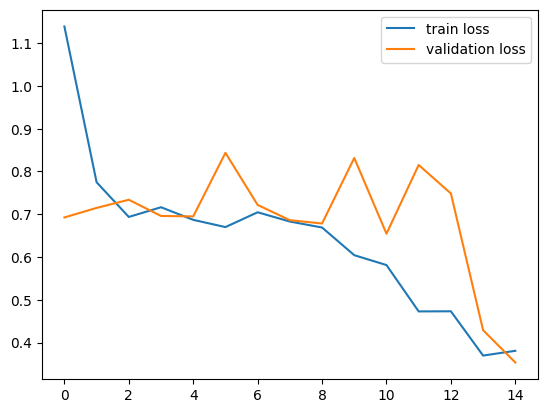

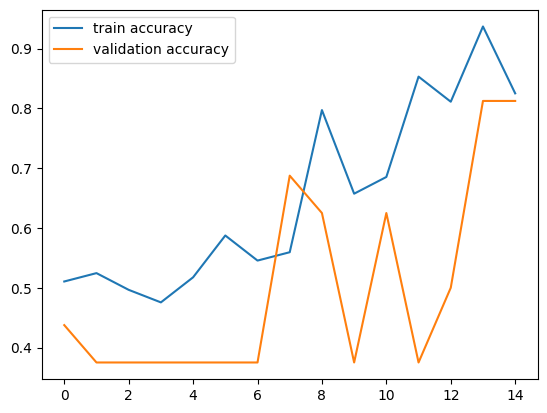

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Pertama, kode tersebut mengevaluasi model menggunakan data pengujian (x_test_scaled dan y_test) dan menyimpan hasilnya dalam variabel 'loss' dan 'accuracy'. Nilai akurasi di-print ke layar sebagai metrik performa pada data pengujian. Selanjutnya, hasil pelatihan model yang disimpan dalam variabel 'history' diplot untuk melihat perubahan nilai fungsi loss pada set pelatihan dan validasi. Grafik pertama menunjukkan perubahan nilai loss pada set pelatihan ('train loss') dan validasi ('validation loss'). Grafik kedua memvisualisasikan perubahan nilai akurasi pada set pelatihan ('train accuracy') dan validasi ('validation accuracy'). Plot ini membantu analisis visual terhadap kinerja model selama pelatihan, dan dapat memberikan wawasan terkait overfitting atau underfitting. Dapat diketahui bahwa nilai akurasi cukup tinggi yaitu sekitar 85%

- Sistem Prediksi

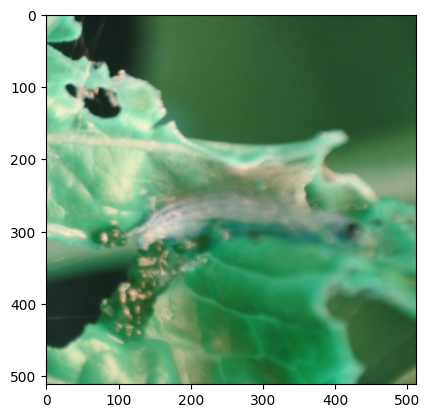

1/1 [==============================] - 1s 545ms/step
[[-2.8010454  4.3584666]]
1
The leaves in the picture are affected by pests


In [ ]:
#input_image_path = input (Path of the image to be predicted: ')
input_image_path = path_with_pest + '/10.png'
input_image = cv2.imread (input_image_path)

imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The leaves in the picture are affected by pests')
else:
  print('The leaves in the picture are not affected by pests')


Kode tersebut digunakan untuk memprediksi apakah sebuah gambar daun terpengaruh oleh hama atau tidak. Pertama, diminta untuk memasukkan path gambar yang akan diprediksi. Dalam contoh ini, path tersebut telah ditentukan sebagai 'path_with_pest + '/10.png''. Gambar tersebut kemudian dibaca menggunakan OpenCV (cv2) dan ditampilkan menggunakan matplotlib. Selanjutnya, gambar diubah ukurannya menjadi 128x128 piksel, dinormalisasi, dan diubah bentuknya sesuai dengan format yang dapat diproses oleh model neural network. Prediksi kemudian dilakukan dengan menggunakan model yang telah diinisialisasi sebelumnya. Hasil prediksi dicetak dan nilai label prediksi diambil menggunakan np.argmax. Berdasarkan nilai label, program memberikan output berupa informasi apakah daun dalam gambar tersebut terinfeksi oleh hama atau tidak. Dan hasilnya adalah daun pada gambar tersebut terinfeksi oleh hama.

- Tes akurasi model

In [ ]:
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
      tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
      pretrained_model,
      tf.keras.layers.Dense(num_of_classes)
])

model.summary()

model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs=15)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_7 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/15
5/5 [==============================] - 11s 1s/step - loss: 0.4781 - acc: 0.7987
Epoch 2/15
5/5 [==============================] - 4s 908ms/step - loss: 0.2621 - acc: 0.9182
Epoch 3/15
5/5 [==============================] - 4s 881ms/step - loss: 0.1562 - acc: 0.9560
E

Dengan menggunakan KerasLayer dari TensorFlow Hub, model ini dimuat sebagai lapisan dalam model Sequential. Lapisan InputLayer ditambahkan untuk menentukan bentuk input, diikuti oleh Lambda layer untuk meresize gambar input menjadi ukuran yang diharapkan oleh MobileNetV2 (224x224 piksel). Lapisan pretrained_model kemudian dimasukkan, dan lapisan Dense ditambahkan sebagai output layer dengan jumlah neuron yang sesuai dengan jumlah kelas yang ada. Model ini tidak melibatkan proses fine-tuning, karena parameter trainable diatur sebagai False pada pretrained_model. Ringkasan model dan konfigurasi kompilasi ditampilkan menggunakan fungsi summary(). Model menggunakan optimizer Adam, fungsi loss SparseCategoricalCrossentropy (dikonfigurasi untuk tugas klasifikasi), dan metrik akurasi untuk pelatihan. Selanjutnya, model dilatih dengan menggunakan data x_train_scaled dan y_train selama 15 epoch.

- Skor akurasi

In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}')

2/2 [==============================] - 2s 199ms/step - loss: 0.0626 - acc: 0.9750
Test Loss = 0.06261798739433289
Test Accuracy = 0.9750000238418579


Kode ini digunakan untuk mengevaluasi kinerja model neural network yang telah dilatih pada data pengujian (test set). Variabel x_test_scaled dan y_test mewakili fitur dan label dari data pengujian yang telah dinormalisasi. Metode evaluate digunakan untuk menghitung nilai loss dan akurasi model pada data pengujian. Nilai loss dan akurasi kemudian dicetak menggunakan pernyataan print. Loss merupakan ukuran seberapa baik atau buruk model memprediksi label pada data pengujian, sedangkan akurasi mencerminkan sejauh mana model berhasil mengklasifikasikan data dengan benar. Dan didapatkan hasil Test Loss sebesar 0.06261798739433289 dan Test Acuracy sebesar 0.9750000238418579

## **LATIHAN CNN**
#### Buatlah sebuah model CNN dengan studi kasus gambar sayur sawi dengan database “data Latihan”

- Tahap pertama persiapan data dan library

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

- Pastikan terhubung dengan Gdrive masing-masing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_with_pest = '/content/drive/MyDrive/SAWI/train/copy of Data Sawi Ada Hama'
path_without_pest = '/content/drive/MyDrive/SAWI/train/copy of Data Sawi Tanpa Hama'

In [ ]:
#load data files
pest_files = os.listdir(path_with_pest)
print(pest_files[0:5])
print (pest_files[-5:])

nopest_files = os.listdir (path_without_pest)
print(nopest_files [0:5])
print(nopest_files[-5:])

print(f'Number of with pest images:{len(pest_files)}')
print(f'Number of without pest images:{len(nopest_files)}')

['192.png', '190.png', '19.png', '191.png', '234.png']
['84.png', '55.png', '85.png', '96.png', '68.png']
['193.png', '195.png', '19.png', '191.png', '190.png']
['77.png', '9.png', '99.png', '8.png', '61.png']
Number of with pest images:400
Number of without pest images:400


Mengeksplorasi data gambar dalam dua direktori yang berbeda, yaitu path_with_pest dan path_without_pest. Pertama, menggunakan modul os, list dari nama file dalam masing-masing direktori diambil dan dicetak lima file pertama dan lima file terakhir dari setiap direktori. Selanjutnya, jumlah total file gambar dalam setiap kategori dicetak.

- Membuat label pada data

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
400
400
800
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


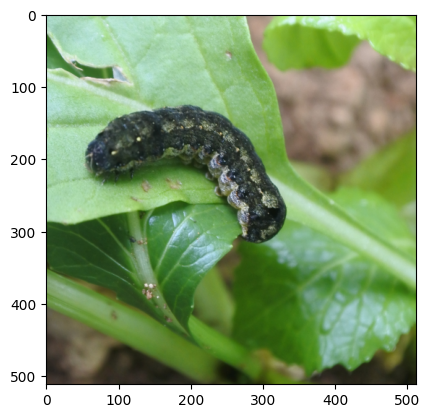

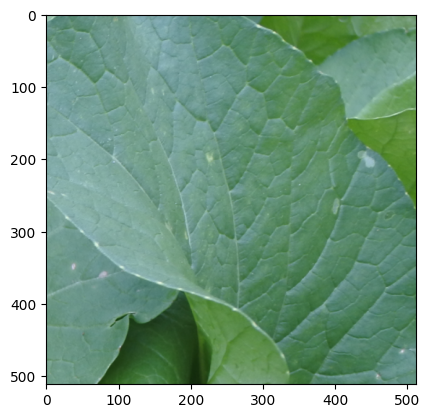

In [ ]:
pest_files = [1]*len(pest_files)
nopest_files = [0]*len(nopest_files)
print(pest_files[0:5]),print(nopest_files[0:5])
print(len(pest_files)),print(len(nopest_files))

labels = pest_files + nopest_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

# display with pest image
img = mpimg.imread(path_with_pest + '/19.png')
implot = plt.imshow(img)
plt.show()

# displaying without pest image
img = mpimg.imread(path_without_pest + '/19.png')
implot = plt.imshow(img)
plt.show()

Menyiapkan label yang sesuai dengan data gambar yang akan digunakan dalam pelatihan model. Dua list, pest_files dan nopest_files, dibuat dan diisi dengan nilai 1 dan 0 secara sesuai. Panjang kedua list ini disesuaikan dengan jumlah file gambar dalam set data "pest" dan "nopest". Setelah itu, kedua list tersebut di-print untuk menunjukkan lima elemen pertama dari masing-masingnya, dan total panjangnya dicetak. Selanjutnya, label-label ini digabungkan menjadi satu list tunggal yang disebut labels, mewakili kategori hama (1) dan tanpa hama (0). Panjang total dari list labels dicetak, dan lima elemen pertama serta lima elemen terakhirnya juga dicetak. Terakhir, dua gambar (dengan hama dan tanpa hama) dari direktori yang sesuai ditampilkan untuk memberikan gambaran visual tentang data yang akan digunakan dalam pelatihan model.

- Pemrosesan data

In [ ]:
data = []

pest_files = os.listdir(path_with_pest)

for img_file in pest_files:
  image = Image.open(path_with_pest + '/' + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

nopest_files = os.listdir (path_without_pest)

for img_file in nopest_files:
  image = Image.open(path_without_pest + '/' + str(img_file))
  image = image.resize((128,128))
  image = image.convert ('RGB')
  image = np.array(image)
  data.append(image)

type (data),len(data)

data[0]

# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

Kode ini berfungsi untuk memproses gambar pada dua set data yang berbeda (dengan dan tanpa hama) dan menyimpannya dalam bentuk array untuk keperluan pelatihan model. Pertama, file gambar pada direktori yang mengandung hama (path_with_pest) diambil dan diubah menjadi array menggunakan modul Image dari library PIL. Setiap gambar kemudian diubah ukurannya menjadi 128x128 piksel dan dikonversi menjadi mode warna RGB. Proses yang sama juga diulang untuk gambar pada direktori tanpa hama (path_without_pest). Setiap array gambar kemudian ditambahkan ke dalam list data. Akhirnya, list ini diubah menjadi array numpy dengan nama x. Dengan asumsi bahwa sebelumnya ada label yang sesuai untuk setiap gambar (misalnya, labels), array label tersebut juga diubah menjadi array numpy dengan nama y.

- Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print (x.shape, x_train.shape, x_test.shape)

x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(800, 128, 128, 3) (640, 128, 128, 3) (160, 128, 128, 3)


(array([[[111, 153,  67],
         [111, 153,  67],
         [110, 152,  67],
         ...,
         [144, 184,  95],
         [144, 184,  95],
         [140, 181,  89]],
 
        [[110, 153,  67],
         [108, 151,  65],
         [105, 149,  64],
         ...,
         [142, 182,  95],
         [144, 184,  96],
         [140, 180,  90]],
 
        [[106, 151,  63],
         [104, 149,  63],
         [105, 148,  65],
         ...,
         [146, 185, 101],
         [146, 185, 103],
         [143, 182,  97]],
 
        ...,
 
        [[130, 173,  91],
         [130, 173,  91],
         [129, 172,  90],
         ...,
         [158, 193, 109],
         [156, 191, 107],
         [149, 186,  99]],
 
        [[130, 173,  91],
         [130, 173,  91],
         [130, 173,  91],
         ...,
         [157, 192, 107],
         [154, 189, 103],
         [150, 186,  98]],
 
        [[129, 173,  89],
         [130, 174,  91],
         [131, 174,  92],
         ...,
         [156, 192, 105],
  

Kode tersebut mengimplementasikan proses pembagian dataset menjadi data pelatihan (x_train, y_train) dan data pengujian (x_test, y_test) menggunakan fungsi train_test_split dari scikit-learn. Data dibagi dengan rasio 80:20 untuk data pelatihan dan pengujian, dan random_state diatur ke 42 untuk memastikan reproduktibilitas hasil. Hasil cetakan menunjukkan dimensi dari array asli (x), data pelatihan (x_train), dan data pengujian (x_test). Selanjutnya, nilai piksel dalam data pelatihan dan pengujian diukur ulang (scaled) dengan membagi setiap nilai piksel dengan 255, sehingga mendapatkan nilai dalam rentang 0 hingga 1. Cetakannya menunjukkan nilai piksel dari gambar pertama dalam data pelatihan sebelum dan setelah diukur ulang.

- CNN

In [ ]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
18/18 [==============================] - 22s 1s/step - loss: 0.8774 - acc: 0.5990 - val_loss: 0.5209 - val_acc: 0.7812
Epoch 2/15
18/18 [==============================] - 17s 933ms/step - loss: 0.4754 - acc: 0.7743 - val_loss: 0.5636 - val_acc: 0.7031
Epoch 3/15
18/18 [==============================] - 16s 928ms/step - loss: 0.4286 - acc: 0.8056 - val_loss: 0.4433 - val_acc: 0.7812
Epoch 4/15
18/18 [==============================] - 16s 928ms/step - loss: 0.3920 - acc: 0.8351 - val_loss: 0.5110 - val_acc: 0.7344
Epoch 5/15
18/18 [==============================] - 17s 931ms/step - loss: 0.3822 - acc: 0.8194 - val_loss: 0.4366 - val_acc: 0.7656
Epoch 6/15
18/18 [==============================] - 16s 918ms/step - loss: 0.3033 - acc: 0.8663 - val_loss: 0.4413 - val_acc: 0.8125
Epoch 7/15
18/18 [==============================] - 16s 904ms/step - loss: 0.3466 - acc: 0.8542 - val_loss: 0.3310 - val_acc: 0.8125
Epoch 8/15
18/18 [==============================] - 15s 818ms/step - los


Kode tersebut mendefinisikan sebuah model neural network menggunakan Keras untuk tugas klasifikasi dengan dua kelas. Model ini terdiri dari dua lapisan konvolusi (Conv2D) dengan masing-masing dilanjutkan oleh lapisan max pooling untuk mengekstraksi dan mereduksi fitur dari gambar input berukuran 128x128 piksel dan tiga saluran warna (RGB). Setelah itu, terdapat dua lapisan Dense (fully connected) dengan aktivasi ReLU dan Dropout untuk mencegah overfitting. Flatten Layer digunakan untuk mengubah tensor menjadi satu dimensi agar dapat dihubungkan ke lapisan Dense. Lapisan output terdiri dari satu neuron untuk setiap kelas dengan aktivasi sigmoid, sesuai dengan masalah klasifikasi biner. Model ini menggunakan fungsi kerugian 'sparse_categorical_crossentropy' karena label kelas bersifat sparse dan optimizer 'adam' untuk mengoptimalkan pembelajaran. Selanjutnya, model dilatih menggunakan data pelatihan yang telah di-scaled (x_train_scaled) dan labelnya (y_train) dengan validasi sebesar 10% dari data pelatihan selama 15 epoch.

- Model Evaluasi

5/5 [==============================] - 2s 446ms/step - loss: 0.2198 - acc: 0.9125
Test Accuracy = 0.9125000238418579


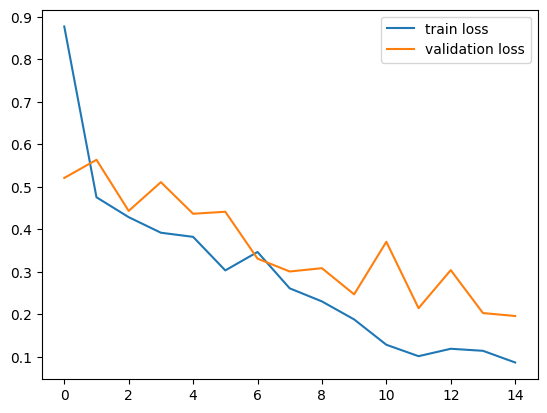

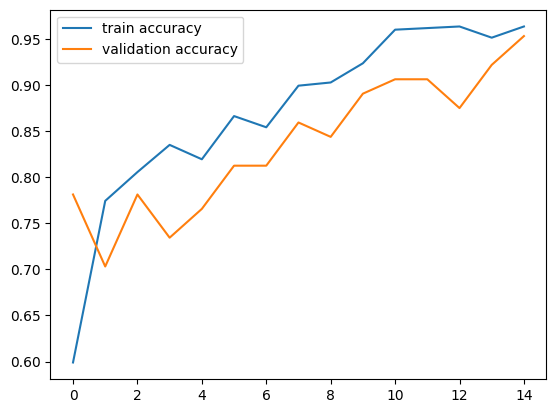

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Pertama, kode tersebut mengevaluasi model menggunakan data pengujian (x_test_scaled dan y_test) dan menyimpan hasilnya dalam variabel 'loss' dan 'accuracy'. Nilai akurasi di-print ke layar sebagai metrik performa pada data pengujian. Selanjutnya, hasil pelatihan model yang disimpan dalam variabel 'history' diplot untuk melihat perubahan nilai fungsi loss pada set pelatihan dan validasi. Grafik pertama menunjukkan perubahan nilai loss pada set pelatihan ('train loss') dan validasi ('validation loss'). Grafik kedua memvisualisasikan perubahan nilai akurasi pada set pelatihan ('train accuracy') dan validasi ('validation accuracy'). Plot ini membantu analisis visual terhadap kinerja model selama pelatihan, dan dapat memberikan wawasan terkait overfitting atau underfitting. Dapat diketahui bahwa hasil akurasinya sangat besar yaitu sekitar 91%

- Sistem Prediksi

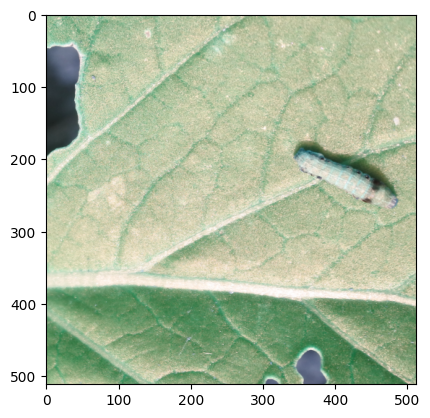

1/1 [==============================] - 0s 105ms/step
[[0.00267433 0.98384666]]
1
The leaves in the picture are affected by pests


In [ ]:
#input_image_path = input (Path of the image to be predicted: ')
input_image_path = path_with_pest + '/190.png'
input_image = cv2.imread (input_image_path)

imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The leaves in the picture are affected by pests')
else:
  print('The leaves in the picture are not affected by pests')


Kode tersebut digunakan untuk memprediksi apakah sebuah gambar daun terpengaruh oleh hama atau tidak. Pertama, pengguna diminta untuk memasukkan path gambar yang akan diprediksi. Dalam contoh ini, path tersebut telah ditentukan sebagai 'path_with_pest + '/1.png''. Gambar tersebut kemudian dibaca menggunakan OpenCV (cv2) dan ditampilkan menggunakan matplotlib. Selanjutnya, gambar diubah ukurannya menjadi 128x128 piksel, dinormalisasi, dan diubah bentuknya sesuai dengan format yang dapat diproses oleh model neural network. Prediksi kemudian dilakukan dengan menggunakan model yang telah diinisialisasi sebelumnya. Hasil prediksi dicetak dan nilai label prediksi diambil menggunakan np.argmax. Berdasarkan nilai label, program memberikan output berupa informasi apakah daun dalam gambar tersebut terinfeksi oleh hama atau tidak. Dan hasilnya adalah daun pada gambar tersebut terinfeksi oleh hama.

- Tes akurasi model

In [ ]:
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
      tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
      pretrained_model,
      tf.keras.layers.Dense(num_of_classes)
])

model.summary()

model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs=15)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_11 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/15
20/20 [==============================] - 29s 1s/step - loss: 0.4622 - acc: 0.7703
Epoch 2/15
20/20 [==============================] - 21s 1s/step - loss: 0.1376 - acc: 0.9578
Epoch 3/15
20/20 [==============================] - 22s 1s/step - loss: 0.0916 - acc: 0.9781

Dengan menggunakan KerasLayer dari TensorFlow Hub, model ini dimuat sebagai lapisan dalam model Sequential. Lapisan InputLayer ditambahkan untuk menentukan bentuk input, diikuti oleh Lambda layer untuk meresize gambar input menjadi ukuran yang diharapkan oleh MobileNetV2 (224x224 piksel). Lapisan pretrained_model kemudian dimasukkan, dan lapisan Dense ditambahkan sebagai output layer dengan jumlah neuron yang sesuai dengan jumlah kelas yang ada. Model ini tidak melibatkan proses fine-tuning, karena parameter trainable diatur sebagai False pada pretrained_model. Ringkasan model dan konfigurasi kompilasi ditampilkan menggunakan fungsi summary(). Model menggunakan optimizer Adam, fungsi loss SparseCategoricalCrossentropy (dikonfigurasi untuk tugas klasifikasi), dan metrik akurasi untuk pelatihan. Selanjutnya, model dilatih dengan menggunakan data x_train_scaled dan y_train selama 15 epoch.

- Skor akurasi

In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}')

5/5 [==============================] - 8s 2s/step - loss: 0.0520 - acc: 0.9812
Test Loss = 0.05200877785682678
Test Accuracy = 0.981249988079071


Kode ini digunakan untuk mengevaluasi kinerja model neural network yang telah dilatih pada data pengujian (test set). Variabel x_test_scaled dan y_test mewakili fitur dan label dari data pengujian yang telah dinormalisasi. Metode evaluate digunakan untuk menghitung nilai loss dan akurasi model pada data pengujian. Nilai loss dan akurasi kemudian dicetak menggunakan pernyataan print. Loss merupakan ukuran seberapa baik atau buruk model memprediksi label pada data pengujian, sedangkan akurasi mencerminkan sejauh mana model berhasil mengklasifikasikan data dengan benar. Dan didapatkan hasil Test Loss sebesar 0.0.05200877785682678 dan Test Acuracy sebesar 0.981249988079071

**KESIMPULAN**

Dapat diketahui bahwa dengan menggunakan data train dan data valid, memiliki tingkat akurasi gambar yang sangat tinggi. Hal ini berarti model CNN yang digunakan cukup tepat sehingga bisa menghasilkan prediksi yang tepat juga.

**PSEUCOCODE**



```
1 Persiapan Data dan Library
impor library

2. Sambungkan ke Google Drive
sambungkan Google Drive

3. menyimpan path direktori gambar dengan hama dan tanpa hama
path_with_pest = 'path_to_images_with_pest'
path_without_pest = 'path_to_images_without_pest'

4. Muat file data
Muat pest_files dan nopest_files dari masing-masing direktori

5. Tampilkan nama file untuk referensi
Tampilkan nama file untuk pest_files dan nopest_files

6. Hitung jumlah gambar di setiap kelas
Hitung jumlah gambar di path_with_pest dan path_without_pest

7. Buat label untuk data
Buat label untuk pest_files dan nopest_files

8. Tampilkan gambar contoh
Tampilkan contoh gambar dari path_with_pest dan path_without_pest

9. Pemrosesan awal data
Inisialisasi daftar data kosong

10. Memproses gambar dari path_with_pest
untuk setiap gambar di pest_files:
    Buka gambar
    Ubah ukuran gambar menjadi (128, 128)
    Ubah gambar ke mode RGB
    Ubah gambar menjadi array numpy
    Tambahkan data gambar ke daftar data

11. Memproses gambar dari path_without_pest
untuk setiap gambar di nopest_files:
    Buka gambar
    Ubah ukuran gambar menjadi (128, 128)
    Ubah gambar ke mode RGB
    Ubah gambar menjadi array numpy
    Tambahkan data gambar ke data
    daftar

12. Ubah daftar gambar dan label menjadi array numpy
Ubah daftar data menjadi array numpy x
Ubah daftar label menjadi array numpy y

12. Pemisahan Tes dan Train
Bagi data menjadi set pelatihan dan pengujian (x_train, x_test, y_train, y_test) menggunakan train_test_split

13. Normalisasikan nilai piksel
Normalisasikan nilai piksel x_train dan x_test ke rentang [0, 1]

14. Jaringan Neural Konvolusional (CNN)
Tentukan jumlah kelas sebagai 2

15. Buat model sekuensial
Tambahkan lapisan Conv2D dengan 32 filter, ukuran kernel (3,3), aktivasi ReLU, dan bentuk input (128, 128, 3)
Tambahkan layer MaxPooling2D dengan ukuran pool (2,2)
Tambahkan lapisan Conv2D dengan 64 filter, ukuran kernel (3,3), dan aktivasi ReLU
Tambahkan layer MaxPooling2D dengan ukuran pool (2,2)

16. Tambahkan lapisan Ratakan
Tambahkan lapisan Dense dengan 128 neuron dan aktivasi ReLU
Tambahkan layer Dropout dengan tingkat dropout 0,5
Tambahkan lapisan Dense dengan 64 neuron dan aktivasi ReLU
Tambahkan layer Dropout dengan tingkat dropout 0,5
Tambahkan lapisan keluaran Dense dengan neuron num_of_classes dan aktivasi sigmoid

Kompilasi model dengan pengoptimal Adam, kehilangan crossentropy kategoris jarang, dan metrik akurasi

Latih model pada data pelatihan selama 15 periode, menggunakan 10% data untuk validasi

17. Evaluasi Model
Evaluasi model pada data pengujian dan akurasi pengujian cetak

18. Plot sejarah pelatihan
Plot kerugian dan akurasi pelatihan selama beberapa waktu

19. Sistem Prediksi
Tentukan input_image_path dengan jalur ke gambar untuk prediksi
Membaca dan menampilkan gambar masukan
Ubah ukuran dan normalkan gambar masukan
Bentuk ulang gambar masukan untuk prediksi
Memprediksi probabilitas kelas untuk gambar masukan \
Cetak probabilitas prediksi dan label prediksi \
Menampilkan pesan berdasarkan prediksi label \

20. Uji Akurasi Model
Gunakan model MobileNet terlatih untuk ekstraksi fitur \
Buat model baru menggunakan MobileNet sebagai lapisan awal dan lapisan keluaran Dense
Kompilasi dan latih model baru pada data pelatihan \
Evaluasi model baru pada data pengujian dan cetak kehilangan dan akurasi pengujian
```



**FLOWCHART**

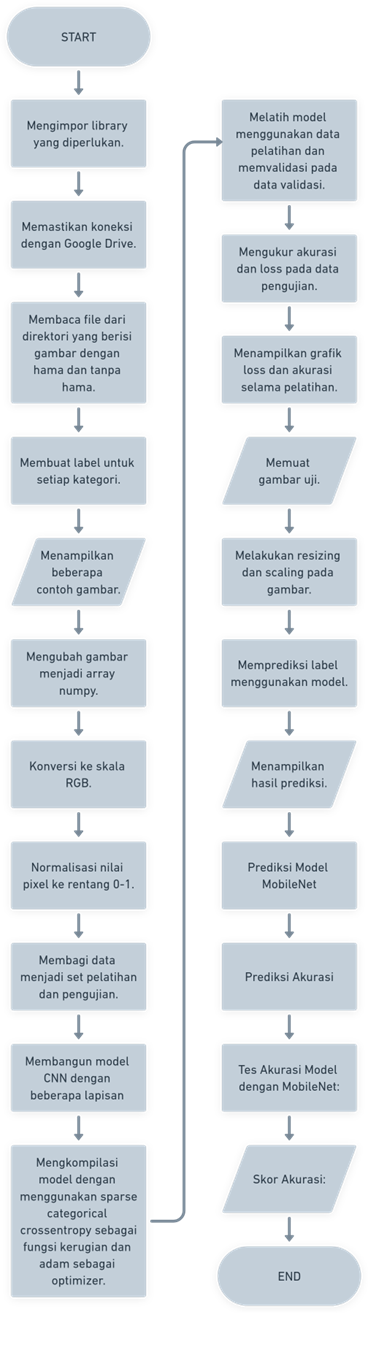